In [1]:
import advertools as adv
import pandas as pd
import numpy as np1
import tqdm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def migrants(language_out,language_in,years,exclude="_exc_all"):
    #Take only the first appearances of words
    
    migrant_df = pd.read_csv("Migrant/migrant_1800.csv")

    migrant_df.drop(migrant_df.columns[0],inplace=True,axis=1)
    
    first_appearance = migrant_df.drop_duplicates(subset='word',
                                               keep='first')
    #take the words created by the out language.
    out_words = first_appearance[first_appearance["language"] == language_out ]
    
    #Take the words that
    migrated_from_out = migrant_df[(migrant_df["word"].isin(out_words["word"])) & 
                               (migrant_df["year"].isin(years)) &
                                (migrant_df["language"] == language_in)
                               ]
    return(migrated_from_out)

migrants("english","french",range(1740,2009),"_exc_all")


,word,year,count,language,Rank
5,abandon,1800,2470,french,4687.0
28,absent,1801,3947,french,4334.0
32,absorption,1801,5694,french,3125.0
64,accident,1800,5066,french,2442.0
70,accidents,1837,10292,french,3945.0
...,...,...,...,...,...
14195,world,1990,19327,french,4826.0
14241,xvii,1802,3310,french,4567.0
14246,xviii,1802,2979,french,4965.0
14296,york,1814,3871,french,2992.0


In [10]:
pd.options.mode.chained_assignment = None  # default='warn'

def uset(language_out,language_in,year,years_acc,exclude="_exc_all"):
    
    lista = []
    words = migrants(language_out,language_in,years_acc,exclude)["word"]
    
    lan_in_df = pd.read_csv("Top5000/"+"top_"+language_in + exclude +
                            ".csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                         names = ["word","year","count"], header=None,index_col=False)
    
    lan_in_df['Rank'] = lan_in_df.groupby("year")["count"].rank(ascending=False, 
                                                            method='first')
    lan_in_df = lan_in_df.sort_values(by=["year", "Rank"])
    
    
    lan_in_year = lan_in_df[lan_in_df["year"]==year]
    
    normalization = np.sum(lan_in_year["count"])

    words_year = lan_in_year[lan_in_year["word"].isin(words)]
    words_year["uso"] = words_year["count"]/normalization
    
    
    for per in range(100,1,-1):
        reduced_words_year = words_year[0:int(len(words_year)*per/100)]
#         print(reduced_words_year)
#         result = np.sum(reduced_words_year["uso"])/np.mean(reduced_words_year["uso"])
        result = np.sum(reduced_words_year["uso"])
        
        lista.append(result)
        
    

    return(np.array(lista))

def use(language_out,language_in,years,exclude="_exc_all"):
    dframe = pd.DataFrame()
    dframe["Percentage"] = range(100,1,-1)
    for year in tqdm.tqdm(years):
#         print(uset(language_out,language_in,year,range(1740,year+1)))
        dframe[year]=uset(language_out,language_in,year,range(1850,year+1),exclude)
        dframe = dframe.copy()
    dframe=dframe.set_index("Percentage")

    return(dframe)

In [17]:
language = ["english","spanish","french","german","italian"]
exclude = "_exc_all"

for lan_in in language:
    for lan_out in language:
        print(lan_out,lan_in)
        if lan_in == lan_out:
            continue
        
        df = use(lan_out,lan_in,range(1900,2009),exclude)
        df.to_csv("Fig5_data/" + lan_out + "_" + lan_in + exclude+ ".csv")
        


english english
spanish english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:32<00:00,  1.40s/it]


french english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:34<00:00,  1.42s/it]


german english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:30<00:00,  1.38s/it]


italian english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:44<00:00,  1.51s/it]


english spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:44<00:00,  1.51s/it]


spanish spanish
french spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:34<00:00,  1.42s/it]


german spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:39<00:00,  1.46s/it]


italian spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:53<00:00,  1.59s/it]


english french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:31<00:00,  1.39s/it]


spanish french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:25<00:00,  1.34s/it]


french french
german french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:35<00:00,  1.43s/it]


italian french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:21<00:00,  1.29s/it]


english german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:24<00:00,  1.33s/it]


spanish german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:26<00:00,  1.34s/it]


french german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:32<00:00,  1.40s/it]


german german
italian german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:20<00:00,  1.28s/it]


english italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:15<00:00,  1.24s/it]


spanish italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:21<00:00,  1.29s/it]


french italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:15<00:00,  1.24s/it]


german italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:12<00:00,  1.21s/it]

italian italian


## Deleting first ranks

In [18]:
pd.options.mode.chained_assignment = None  # default='warn'

def uset_r(language_out,language_in,year,years_acc,exclude="_exc_all"):
    lista = []
    words = migrants(language_out,language_in,years_acc,exclude)["word"]
    lan_in_df = pd.read_csv("Top5000/"+"top_"+language_in + exclude+
                            ".csv",dtype={"0":str, "1":np.int32, "2":np.int32},
                         names = ["word","year","count"], header=None,index_col=False)
    
    lan_in_df['Rank'] = lan_in_df.groupby("year")["count"].rank(ascending=False, method='first')
#     lan_in_df = lan_in_df.sort_values(by=["year", "Rank"])
    
    
    lan_in_year = lan_in_df[lan_in_df["year"]==year]
    lan_in_year = lan_in_year.sort_values(by="Rank",ascending=True)
    
    normalization = np.sum(lan_in_year["count"])

    words_year = lan_in_year[lan_in_year["word"].isin(words)]
    words_year["uso"] = words_year["count"]/normalization
    words_year =words_year.iloc[::-1]

#     print(words_year)
    
    for per in range(100,1,-1):
        reduced_words_year = words_year[0:int(len(words_year)*per/100)]
        result = np.sum(reduced_words_year["uso"])
        lista.append(result)
        
    return(np.array(lista))

def use_r(language_out,language_in,years,exclude="_exc_all"):
    dframe = pd.DataFrame()
    dframe["Percentage"] = range(100,1,-1)
    
    for year in tqdm.tqdm(years):
#         print(uset(language_out,language_in,year,range(1740,year+1)))
        dframe[year]=uset_r(language_out,language_in,year,range(1850,year+1),exclude)
        dframe = dframe.copy()
    dframe=dframe.set_index("Percentage")

    return(dframe)



In [20]:
language = ["english","spanish","french","german","italian"]
# exclude = ""

for lan_in in language:
    for lan_out in language:
        print(lan_out,lan_in)
        if lan_in == lan_out:
            continue
        
        df = use_r(lan_out,lan_in,range(1900,2009),"_exc_all")
        df.to_csv("Fig5_data/" + lan_out + "_" + lan_in + "_exc_all"+  "_r.csv")
        


english english
spanish english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:26<00:00,  1.25it/s]


french english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:36<00:00,  1.13it/s]


german english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:40<00:00,  1.09it/s]


italian english


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:33<00:00,  1.16it/s]


english spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:45<00:00,  1.04it/s]


spanish spanish
french spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:50<00:00,  1.01s/it]


german spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:36<00:00,  1.13it/s]


italian spanish


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:41<00:00,  1.07it/s]


english french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:39<00:00,  1.10it/s]


spanish french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:45<00:00,  1.03it/s]


french french
german french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:55<00:00,  1.06s/it]


italian french


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:50<00:00,  1.02s/it]


english german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:46<00:00,  1.02it/s]


spanish german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:44<00:00,  1.04it/s]


french german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:36<00:00,  1.13it/s]


german german
italian german


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:02<00:00,  1.12s/it]


english italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [02:09<00:00,  1.19s/it]


spanish italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:38<00:00,  1.11it/s]


french italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:23<00:00,  1.31it/s]


german italian


100%|████████████████████████████████████████████████████████████████████████████████| 109/109 [01:21<00:00,  1.34it/s]

italian italian


In [23]:
def calculate_dist(table):
#     print(len(table))
    result = table.div(table.mean(axis=1), axis=0)
    
    distance = []
    for i in range(1,len(result)):
        distance.append(np.sum(np.abs(result.iloc[i,1:]-result.iloc[0,1:]))/109)
    
    return(distance)
    

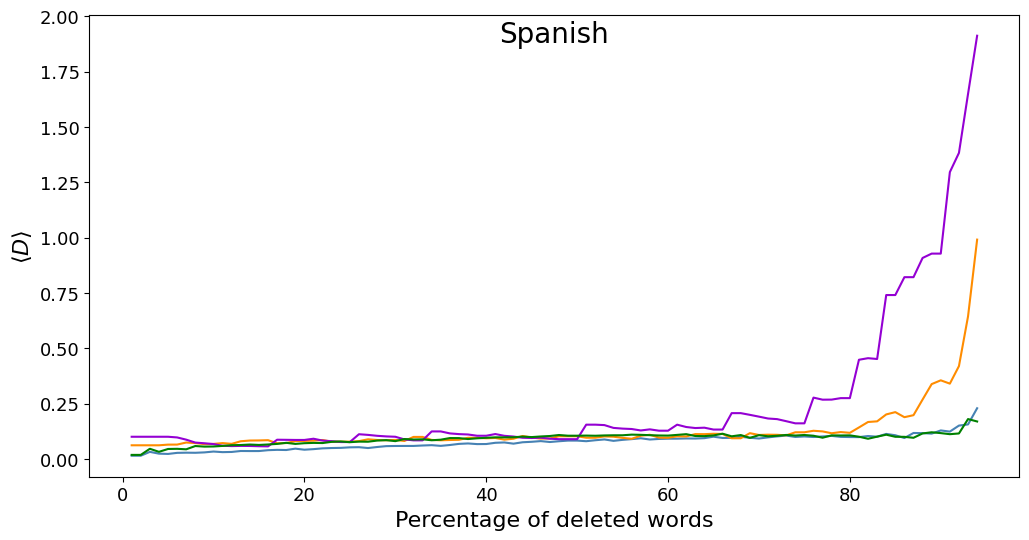

In [28]:
language_out = "spanish"
exclude ="_exc_all"
languages = ["english","french","german","italian","spanish"]
colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}


plt.figure(figsize=(12,6))
for language_in in languages:

    if language_in == language_out:
        continue
        
    

    df = pd.read_csv("Fig5_data/"+language_out + "_"+ language_in+exclude+ "_r" +".csv",
                    index_col="Percentage")
    plt.plot(range(1,95),calculate_dist(df[:-4]),label=language_in,
            color = colors[language_in])
    
    plt.title("Spanish", y=1, pad=-20, fontsize=20)

    plt.xlabel("Percentage of deleted words",fontsize=16)
    plt.ylabel(r"$ \langle D \rangle $",fontsize=16)
    plt.tick_params(axis='both', which='major', labelsize=13)

plt.savefig('Fig5_data/spanish' + exclude + "_r" +  '.png',bbox_inches = "tight")

    
# plt.plot(range(1,97),calculate_dist(a[:-2]))

# Save image

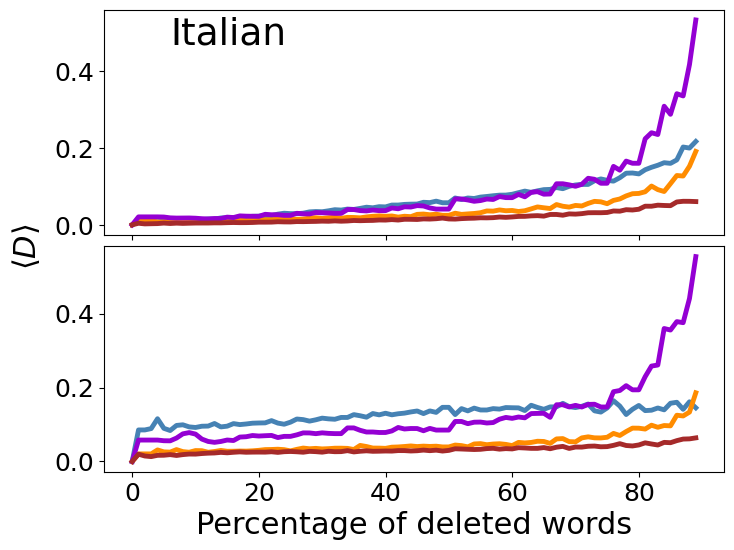

In [36]:
import matplotlib as mpl

fig = plt.figure(figsize=(8,6))
plt.subplots_adjust(hspace=0.05)

spec = mpl.gridspec.GridSpec(ncols=1, nrows=2)

ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[1,0])

axs = [ax1,ax2]



colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}


language_out = "italian"
language_outM = "Italian"

languages = ["english","french","german","italian","spanish"]
ex = "_exc_all"

for i,language_in in enumerate(languages):
    if language_in == language_out:
        continue
        
    df = pd.read_csv("Fig5_data/"+language_out + "_"+ language_in+
                     ex +".csv",
                    index_col="Percentage")
    
    axs[0].plot(range(0,90),np.concatenate([[0],calculate_dist(df[:-9])]),
            color = colors[language_in],linewidth=3.5)
    
    df = pd.read_csv("Fig5_data/"+language_out + "_"+ language_in+
                     ex+ "_r" +".csv",
                    index_col="Percentage")
    
    axs[1].plot(range(0,90),np.concatenate([[0],calculate_dist(df[:-9])]),
            color = colors[language_in],linewidth=3.5)
    
    axs[0].set_title(language_outM, y=1,x=0.2, pad=-25, fontsize=27)

    axs[1].set_xlabel("Percentage of deleted words",fontsize=22)
    
    axs[0].set_ylabel(r"$ \langle D \rangle $",fontsize=22)
    axs[0].set_xticklabels([])
    axs[0].yaxis.set_label_coords(-0.1,-0.05)
    axs[1].tick_params(axis="x",labelsize=18)
    axs[0].tick_params(axis="y",labelsize=18)
    axs[1].tick_params(axis="y",labelsize=18)
    
#     plt.tick_params(axis='both', which='major', labelsize=13)

plt.savefig('Fig5_data/'+language_out + ex +  '.png',bbox_inches = "tight")


In [37]:
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch

# --- handlers ---

class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = h = 10

        # create
        p = patches.Rectangle(xy=(x, y), width=w, height=h)

        # update with data from oryginal object
        self.update_prop(p, orig_handle, legend)

        # move xy to legend
        p.set_transform(trans)

        return [p]

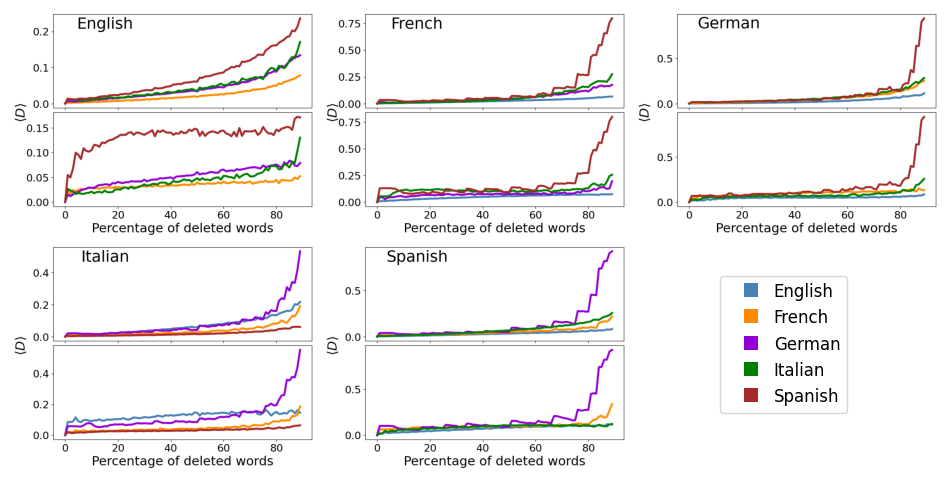

In [38]:
import matplotlib.patches as patches
import matplotlib.image as mpimg


languages = ["english","french","german","italian","spanish"]
languagesM = ["English","French","German","Italian","Spanish"]

ex = "_exc_all"



file_paths = ["Fig5_data/english"+ex+".png",
             "Fig5_data/french"+ex+".png",
             "Fig5_data/german"+ex+".png",
             "Fig5_data/italian"+ex+".png",
             "Fig5_data/spanish"+ex+".png"]


colors = {"english":"steelblue","french":"darkorange","german":"darkviolet",
         "italian":"green","spanish":"brown"}



fig = plt.figure(figsize=(12,6))
plt.subplots_adjust(hspace=0.02)
plt.subplots_adjust(wspace=0.02)


import matplotlib as mpl

spec = mpl.gridspec.GridSpec(ncols=3, nrows=2)


ax1 = fig.add_subplot(spec[0,0])
ax2 = fig.add_subplot(spec[0,1])
ax3 = fig.add_subplot(spec[0,2])
ax4 = fig.add_subplot(spec[1,0])
ax5 = fig.add_subplot(spec[1,1])

axs = [ax1,ax2,ax3,ax4,ax5]

    
for j,lan in enumerate(languages):

    for k,lan2 in enumerate(languages):
        if lan == lan2:
            continue
        file_path = file_paths[j]
#         print(file_path)
        img = mpimg.imread(file_path)  
        axs[j].imshow(img)  
        axs[j].axis('off') 



import matplotlib.patches as mpatches

brown_patch = mpatches.Patch(color='brown', label='Spanish')
green_patch = mpatches.Patch(color='green', label='Italian')
darkviolet_patch = mpatches.Patch(color='darkviolet', label='German')
darkorange_patch = mpatches.Patch(color='darkorange', label='French')
steelblue_patch = mpatches.Patch(color='steelblue', label='English')

# plt.plot(2000,1,markersize=0.001,label="Source Language",
#             color="black",marker="o")

rectb = patches.Rectangle((0,0), 1, 1, facecolor='brown')
rectg = patches.Rectangle((0,0), 1, 1, facecolor='green')
rectd = patches.Rectangle((0,0), 1, 1, facecolor='darkviolet')
rectdo= patches.Rectangle((0,0), 1, 1, facecolor='darkorange')
rects = patches.Rectangle((0,0), 1, 1, facecolor='steelblue')

plt.legend((rects,rectdo,rectd,rectg,rectb),
        ("English","French","German","Italian","Spanish"),
        handler_map = {
            patches.Rectangle: HandlerRect()},
          loc="upper center",
           ncol=1,
    bbox_to_anchor=(0.77, 0.45),
    bbox_transform=fig.transFigure ,
          fontsize=12
          )

# plt.savefig('Fig3_data/image' + ex + '.png',bbox_inches = "tight")


plt.savefig('Fig5_data/image' + ex + '.pdf',bbox_inches = "tight")
   